In [1]:
import matplotlib.pyplot as plt
from imutils import paths
from PIL import Image
import numpy as np
import cv2

In [2]:
list_img = list(paths.list_images('..\\WIDER_val\\WIDER_val\\images'))

In [3]:
Image.open(list_img[0]).size

(1024, 768)

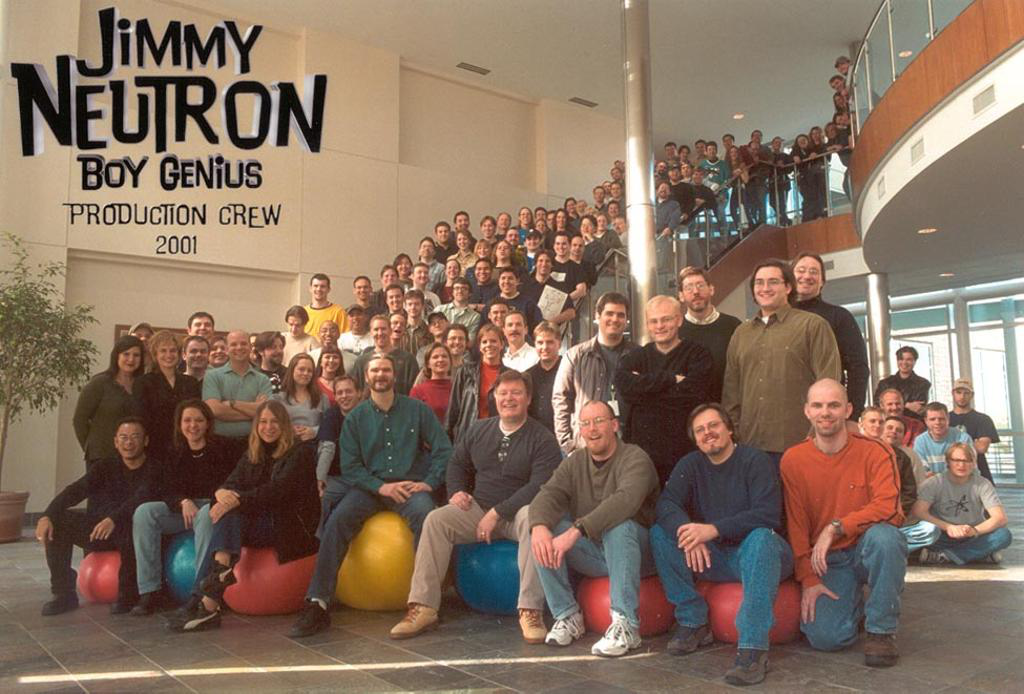

In [4]:
Image.open(list_img[300])

In [5]:
pixel_means = np.array([0.0, 0.0, 0.0], dtype=np.float32)
pixel_stds = np.array([1.0, 1.0, 1.0], dtype=np.float32)
pixel_scale = float(1.0)

In [6]:
def img_process(img):
    target_size = 1024
    max_size = 1980
    im_shape = img.shape
    im_size_min = np.min(im_shape[0:2])
    im_size_max = np.max(im_shape[0:2])
    im_scale = float(target_size) / float(im_size_min)
    if np.round(im_scale * im_size_max) > max_size:
        im_scale = float(max_size) / float(im_size_max)
    im = cv2.resize(img, None, None, fx=im_scale, fy=im_scale, interpolation=cv2.INTER_LINEAR)
    im = im.astype(np.float32)

    im_tensor = np.zeros((1, 3, im.shape[0], im.shape[1]), dtype=np.float32)
    for i in range(3):
        im_tensor[0, i, :, :] = (im[:, :, 2 - i] / pixel_scale - pixel_means[2 - i]) / pixel_stds[2 - i]
        
    return im_tensor, im_scale

In [7]:
img_ten, img_scl = img_process(np.array(Image.open(list_img[300])))

In [9]:
np.array(img_ten)

array([[[[186., 180., 172., ...,  85.,  86.,  86.],
         [185., 179., 172., ...,  85.,  85.,  86.],
         [185., 179., 171., ...,  85.,  85.,  86.],
         ...,
         [100., 101., 102., ..., 116., 114., 113.],
         [ 99., 100., 102., ..., 116., 114., 113.],
         [ 99., 100., 101., ..., 116., 114., 113.]],

        [[222., 216., 207., ..., 125., 125., 126.],
         [221., 215., 207., ..., 125., 125., 126.],
         [221., 215., 207., ..., 125., 125., 126.],
         ...,
         [117., 118., 119., ..., 126., 124., 123.],
         [116., 117., 119., ..., 126., 124., 123.],
         [116., 117., 118., ..., 126., 124., 123.]],

        [[230., 224., 216., ..., 200., 200., 201.],
         [229., 223., 215., ..., 200., 200., 201.],
         [229., 222., 215., ..., 200., 200., 201.],
         ...,
         [138., 139., 140., ..., 143., 141., 140.],
         [137., 138., 140., ..., 143., 141., 140.],
         [137., 138., 139., ..., 143., 141., 140.]]]], dtype=float32)